In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator as Calculator




In [18]:
#Data Cleaning
data = pd.read_excel("inputdata.xlsx")
data['EC_value'], data['EC_error'] = zip(*data['ELE_COD'].map(lambda x: x.split('±')))
data.head()

,NUM,A,B,MOLFRC_A,T,P,ELE_COD,EC_value,EC_error
0,1,[O-]S(=O)(=O)C.c1c[n+](cn1CCCC)C,O,0.004,298.15,101,1.166 ± 0.058,1.166,0.058
1,2,[O-]S(=O)(=O)C.c1c[n+](cn1CCCC)C,O,0.004,299.15,101,1.203 ± 0.06,1.203,0.06
2,3,[O-]S(=O)(=O)C.c1c[n+](cn1CCCC)C,O,0.004,300.15,101,1.242 ± 0.062,1.242,0.062
3,4,[O-]S(=O)(=O)C.c1c[n+](cn1CCCC)C,O,0.004,301.15,101,1.271 ± 0.064,1.271,0.064
4,5,[O-]S(=O)(=O)C.c1c[n+](cn1CCCC)C,O,0.004,302.15,101,1.289 ± 0.064,1.289,0.064


In [19]:
#Setting up for molecular descriptors
n = data.shape[0]
list_of_descriptors = ['NumHeteroatoms','MolWt','NOCount','NumHDonors','RingCount','NumAromaticRings','NumSaturatedRings','NumAliphaticRings']
calc = Calculator(list_of_descriptors)
D = len(list_of_descriptors)
d = len(list_of_descriptors)*2 + 3
print(n,d)

2523 19


In [20]:
#setting up the x and y matrices
X = []
X = np.zeros((n,d))
X[:,-3] = data['T']
X[:,-2] = data['P']
X[:,-1] = data['MOLFRC_A']
print(X.shape)
for i in range(n):
    A = Chem.MolFromSmiles(data['A'][i])
    B = Chem.MolFromSmiles(data['B'][i])
    X[i][:D]    = calc.CalcDescriptors(A)
    X[i][D:2*D] = calc.CalcDescriptors(B)


(2523, 19)


In [21]:
new_data = pd.DataFrame(X,columns=['NumHeteroatoms_A','MolWt_A','NOCount_A','NumHDonors_A','RingCount_A','NumAromaticRings_A','NumSaturatedRings_A','NumAliphaticRings_A','NumHeteroatoms_B','MolWt_B','NOCount_B','NumHDonors_B','RingCount_B','NumAromaticRings_B','NumSaturatedRings_B','NumAliphaticRings_B','T','P','MOLFRC_A'])
y = data['EC_value']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

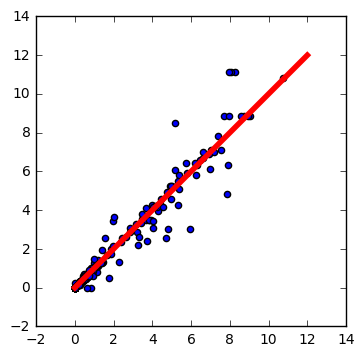

In [22]:
#MLPClassifier
mlp_class = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=3000, random_state=None,learning_rate_init=0.01)
mlp_class.fit(X_train,y_train)

plt.figure(figsize=(4,4))
plt.scatter(y_test.values.astype(np.float), mlp_class.predict(X_test))
plt.plot([0,12],[0,12],lw=4,c = 'r')
plt.show()

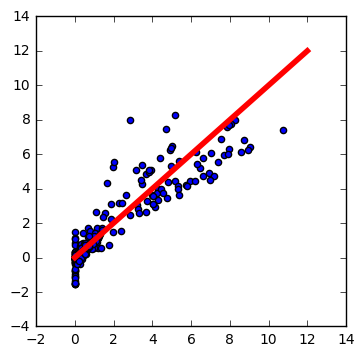

In [23]:
#MLPRegressor
mlp_regr = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=3000, random_state=None,learning_rate_init=0.01)
mlp_regr.fit(X_train,y_train)

plt.figure(figsize=(4,4))
plt.scatter(y_test.values.astype(np.float), mlp_regr.predict(X_test))
plt.plot([0,12],[0,12],lw=4,c = 'r')
plt.show()


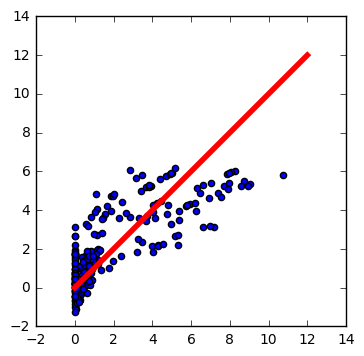

In [32]:
#Lasso
lasso = Lasso(alpha=0.01, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=4000, tol=0.001, warm_start=False, positive=False, random_state=None, selection='cyclic')
lasso.fit(X_train,y_train)

plt.figure(figsize=(4,4))
plt.scatter(y_test.values.astype(np.float),lasso.predict(X_test))
plt.plot([0,12],[0,12],lw=4,c = 'r')
plt.show()

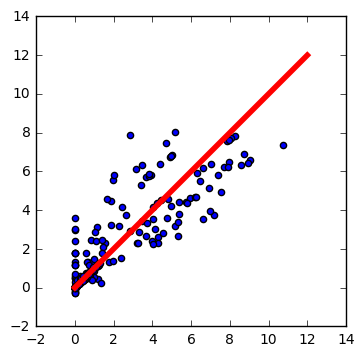

In [37]:
#SVR
svr = SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=1.0, epsilon=0.01, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
svr.fit(X_train,y_train)

plt.figure(figsize=(4,4))
plt.scatter(y_test.values.astype(np.float), svr.predict(X_test))
plt.plot([0,12],[0,12],lw=4,c = 'r')
plt.show()
